In [2]:
import numpy as np 
import pandas as pd 
import csv
import os
import re
import spacy


for dirname, _, filenames in os.walk('/CSC172/K Means Project/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data = pd.read_csv('SPAM_SMS.csv')

In [160]:

# Focus only on the 'text' column, drop the other columns
data = data[['text']]

# Data Cleaning
# Normalize Text: Convert all text to lowercase
#data['ctext'] = data['text'].str.lower()

#df = data[~data.apply(lambda row: row.astype(str).str.contains('content not supported', case=False, na=False).any(), axis=1)]
data = data[~data['text'].str.contains('Content not supported.', case=False, na=False)]
# Step 2: Replace '<REAL NAME>' with an empty string
data['text'] = data['text'].str.replace('<REAL NAME>', '', regex=False)
data['text'] = data['text'].str.replace('<REAL NAME>,', '', regex=False)
print(data)

# Remove Punctuation
data['ctext'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Strip Extra Spaces
data['ctext'] = data['text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Save the cleaned data to a new file
data.to_csv('separate2.csv', index=False)

print("Data cleaning completed and saved as 'separate2.csv'")


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text
0    A new and "Green" township will be rising in the South, MAPLE GROVE.\n\nFor the first time, Megaworld is offering a chance of a lifetime to acquire the most prime COMMERCIAL LOT(s) in the rapidly developing business district of Gen. Trias Cavite.\n\nLot sizes range from 440 to 1,000 sqm (with option to combine)\n\nLimited inventory only. Get yours at PRE-SELLING prices TODAY! We are now accepting reservations.\n\nFor more details and information, please contact:\n\nAndrew @ ++63917****689
1 

In [161]:


# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Load your dataset
data = pd.read_csv('separate2.csv')

# Load and clean stopword files
with open('english-stopwords.txt', 'r') as file:
    english_stopwords = set(word.strip().lower() for word in file.readlines())

with open('genediazjr-tagalog.txt', 'r') as file:
    filipino_stopwords = set(word.strip().lower() for word in file.readlines())

# Combine English and Filipino stopwords
stopwords_combined = english_stopwords.union(filipino_stopwords)

# Preprocess text
def preprocess_text(text):
    # Tokenize and remove stopwords
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if token.text.lower() not in stopwords_combined and token.is_alpha]
    return " ".join(tokens)  # Join tokens back into a string if needed

# Apply preprocessing
data['stopwords_removed'] = data['ctext'].apply(preprocess_text)

# Save the processed data
data.to_csv('stopwords_removed.csv', index=False)
print("Processed data saved as 'separate2.csv'")


Processed data saved as 'separate2.csv'


In [162]:
# Load English word list from nltk or a local file
import nltk
nltk.download('words')
from nltk.corpus import words
english_words = set(words.words())

# Load Tagalog word list
with open('Filipino-wordlist.txt', 'r', encoding='utf-8') as file:
    tagalog_words = set(word.strip().lower() for word in file.readlines())

# Combine English and Tagalog word lists
valid_words = english_words.union(tagalog_words)

[nltk_data] Downloading package words to D:\Documents\4th year
[nltk_data]     files\CSC172\K Means Project\.venv\Lib\site-
[nltk_data]     packages\nltk...
[nltk_data]   Package words is already up-to-date!


In [163]:
def preprocess_text(text):
    # Tokenize and filter out invalid words
    doc = nlp(text)
    tokens = [
        token.text.lower() 
        for token in doc 
        if token.is_alpha and token.text.lower() in valid_words
    ]
    
    # Remove duplicated words while keeping the first occurrence
    unique_tokens = []
    seen = set()
    for token in tokens:
        if token not in seen:
            unique_tokens.append(token)
            seen.add(token)
    
    return " ".join(unique_tokens)

# Apply preprocessing
data['cleaned_text'] = data['stopwords_removed'].apply(preprocess_text)

# Save the cleaned data
data.to_csv('separate2.csv', index=False)
print("Processed data with valid words and no duplicates saved as 'separate2.csv")

Processed data with valid words and no duplicates saved as 'separate2.csv


In [164]:
def detect_language(text):
    # Tokenize the text
    words = text.split()
    
    if not words:  # Handle empty strings
        return 'unknown'
    
    # Count words in each language
    eng_count = sum(1 for word in words if word in english_words)
    tag_count = sum(1 for word in words if word in tagalog_words)
    total_count = len(words)
    
    # Calculate percentages
    eng_percentage = eng_count / total_count
    tag_percentage = tag_count / total_count
    
    # Determine language based on percentage thresholds
    if eng_percentage > 0.5:  # 60% or more English words
        return 'english'
    elif tag_percentage > 0.4:  # 60% or more Tagalog words
        return 'tagalog'
    else:
        return 'unknown'

# Apply language detection
data['language'] = data['cleaned_text'].apply(detect_language)

# Split datasets based on detected language
tagalog_data = data[data['language'] == 'tagalog']
english_data = data[data['language'] == 'english']
unknown_data = data[data['language'] == 'unknown']

# Save the datasets
tagalog_data.to_csv('tagalog_texts1.csv', index=False)
english_data.to_csv('english_texts1.csv', index=False)
unknown_data.to_csv('unknown_texts1.csv', index=False)

print("Data split into 'tagalog_texts1.csv', 'english_texts1.csv', and 'unknown_texts1.csv'")


Data split into 'tagalog_texts1.csv', 'english_texts1.csv', and 'unknown_texts1.csv'


In [165]:
tagalog_path = "tagalog_texts1.csv"  
tpf = pd.read_csv(tagalog_path)

english_path = "english_texts1.csv"  
epf = pd.read_csv(english_path)

pd.set_option('display.max_colwidth', None) 
random_sample = tpf['cleaned_text'].sample(n=5, random_state=42)  
print(random_sample)

random_sample = epf['cleaned_text'].sample(n=5, random_state=30)  
print(random_sample)

84                                            irekomenda kaibigan recharge makakuha rebate
260                                              claim nanalo maglagay upang makuha panalo
45     deposito kasamang pagkakataong manalo exclusive member red envelope halagang premyo
176                                                     magparehistro makakuha tumaya araw
143                        sumali enjoy libreng deposito mas mataas tsansa malaking panalo
Name: cleaned_text, dtype: object
200    landbank alert due registration act please verify mobile number associated account
532                                               join get bonuses free win k grand prize
253       banco de oro please advised temporarily hold due security purposes kindly visit
47                                                          gcash bet get free bonus link
137                                  let see takes win daily lucky draw jackpot city sign
Name: cleaned_text, dtype: object


------------------------------

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import plotly.express as px
import pandas as pd
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import DBSCAN
from wordcloud import WordCloud


tagalog_path = "tagalog_texts1.csv"  
tpf = pd.read_csv(tagalog_path)

english_path = "english_texts1.csv"  
epf = pd.read_csv(english_path)

In [4]:
# Step 1: Vectorize text using BoW
vectorizer = CountVectorizer()   # Adjust features as needed
TX =  vectorizer.fit_transform(tpf['cleaned_text'])

vectorizer = CountVectorizer()   # Adjust features as needed
EX =  vectorizer.fit_transform(epf['cleaned_text'])

TX_dense = TX.toarray()
EX_dense = EX.toarray()

In [168]:
tag_data_points = TX.shape[0]
print(f"Tagalog data points: {tag_data_points}")

eng_data_points = EX.shape[0]
print(f"English data points: {eng_data_points}")

Tagalog data points: 293
English data points: 641


In [5]:
tag_documents = pd.read_csv('tagalog_texts1.csv')
tdocuments = tag_documents['cleaned_text'].tolist()

eng_documents = pd.read_csv('english_texts1.csv')
edocuments = eng_documents['cleaned_text'].tolist()

Silhouette Score: 0.18122893400378734
Davies-Bouldin Index: 1.9062910481055542
Calinski-Harabasz Score: 20.113974826230894

Cluster Distribution:
Cluster 6: 143 points (48.81%)
Cluster 0: 69 points (23.55%)
Cluster 1: 29 points (9.90%)
Cluster 2: 24 points (8.19%)
Cluster 3: 14 points (4.78%)
Cluster 4: 10 points (3.41%)
Cluster 5: 4 points (1.37%)


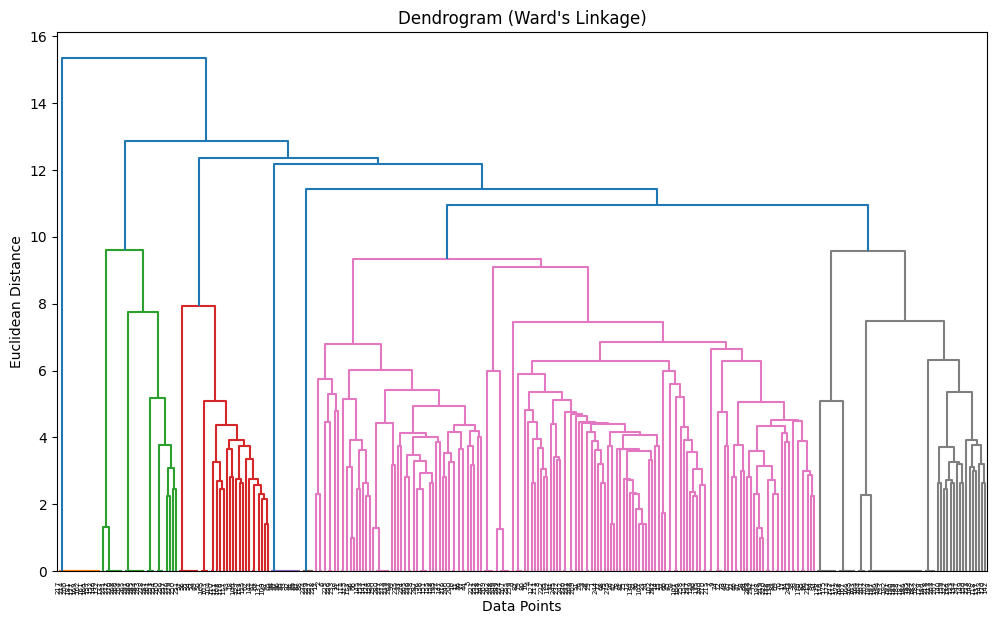

Length of TX_reduced: 293
Length of documents: 293
Length of original_texts: 293
Length of labels: 293


In [232]:
# Step 1: Reduce data to 3D using PCA
pca = PCA(n_components=60)
TX_reduced = pca.fit_transform(TX_dense)

# Step 2: Agglomerative Hierarchical Clustering
# Using Ward's linkage method
k = 7  # Specify the number of clusters
# Use PCA-reduced data for clustering instead of original data
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels = agg_clustering.fit_predict(TX_reduced)  # Use TX_reduced for clustering

# Step 3: Evaluate clustering 
silhouette_avg = silhouette_score(TX_reduced, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Measures the average "similarity ratio" of each cluster with the cluster most similar to it.
# A value closer to 0 indicates well-separated and compact clusters.
db_index = davies_bouldin_score(TX_reduced, labels)
print(f"Davies-Bouldin Index: {db_index}")

# Compares the dispersion of data within clusters to the dispersion between clusters.
# Higher values indicate better-defined clusters.
ch_score = calinski_harabasz_score(TX_reduced, labels)
print(f"Calinski-Harabasz Score: {ch_score}")

# Calculate cluster percentages
cluster_counts = pd.Series(labels).value_counts()
total_points = len(labels)
cluster_percentages = (cluster_counts / total_points) * 100

# Print cluster percentages
print("\nCluster Distribution:")
for cluster_id, count in cluster_counts.items():
    percentage = cluster_percentages[cluster_id]
    print(f"Cluster {cluster_id}: {count} points ({percentage:.2f}%)")

# Step 4: Visualization of dendrogram
plt.figure(figsize=(12, 7))
plt.title("Dendrogram (Ward's Linkage)")
dendrogram = sch.dendrogram(sch.linkage(TX_dense, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

#documents = tdocuments.loc[:, 2]

# Trim the documents array to match the length of TX_reduced and labels
documents = tdocuments[:len(TX_reduced)]  # Cleaned text
original_texts = tpf['text']  # Original text
documents = documents[:len(TX_reduced)]
original_texts = original_texts[:len(TX_reduced)]


# Select the first 3 principal components for visualization
TX_reduced = TX_reduced[:, :3]

# Now create the DataFrame with the matched lengths
data_visualization = pd.DataFrame({
    'PCA1': TX_reduced[:, 0],
    'PCA2': TX_reduced[:, 1],
    'PCA3': TX_reduced[:, 2],
    'Cluster': labels,
    'Document': documents,
    'Original': original_texts  # Uncomment if you want to include original text
})

# Check that the lengths of the columns match
print(f"Length of TX_reduced: {len(TX_reduced)}")
print(f"Length of documents: {len(documents)}")
print(f"Length of original_texts: {len(original_texts)}")
print(f"Length of labels: {len(labels)}")

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(
    data_visualization,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    hover_data={
        'Document': True,          # Cleaned text
        'Original': True,          # Original text
        'Cluster': True,           # Cluster ID
    },
    title="Agglomerative Clustering (Interactive 3D Visualization)"
)

# Customize the layout
fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3',
    ),
    coloraxis_colorbar=dict(title="Cluster"),
    margin=dict(l=0, r=0, b=0, t=40)  # Adjust margins
)

# Show the plot
fig.show()


In [171]:
# Display each cluster as a separate table with left-aligned text
grouped = data_visualization.groupby('Cluster')
for cluster, group in grouped:
    print(f"Cluster {cluster}:")
    display(group[['Original', 'Document']].style.set_properties(subset=['Original', 'Document'], **{'text-align': 'left'}))
    print("\n")


Cluster 0:




Cluster 1:




Cluster 2:




Cluster 3:




Cluster 4:




Cluster 5:




Cluster 6:


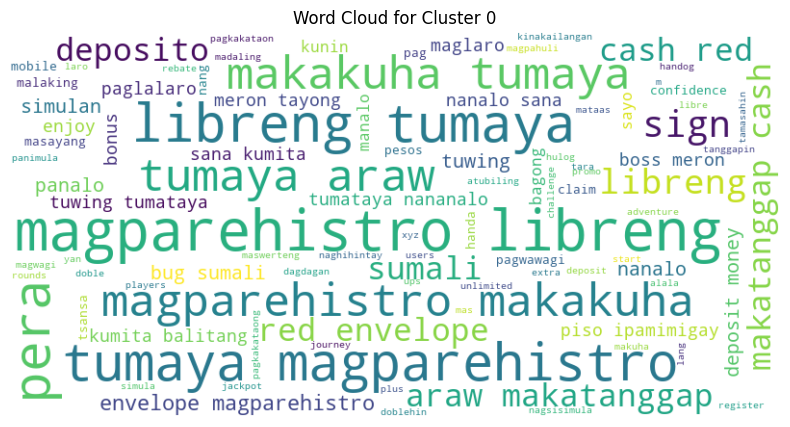

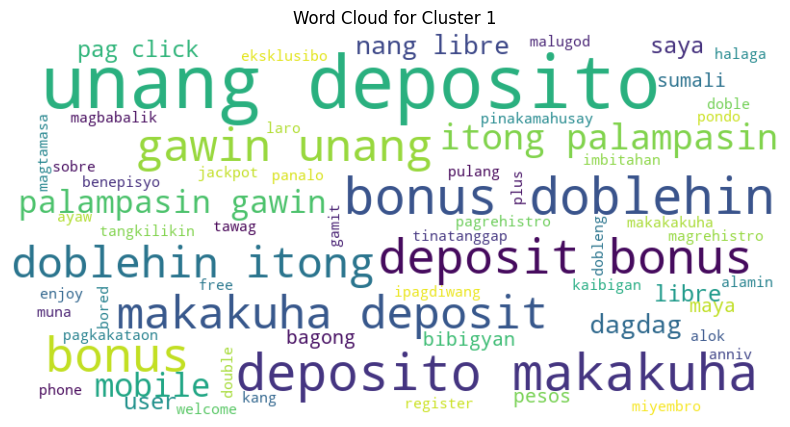

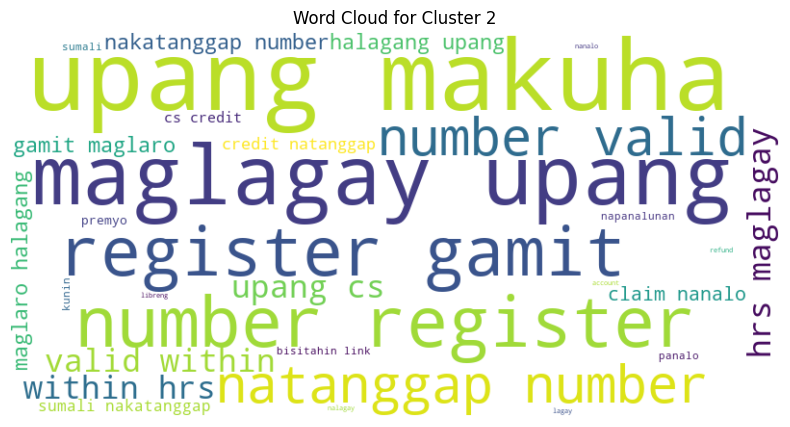

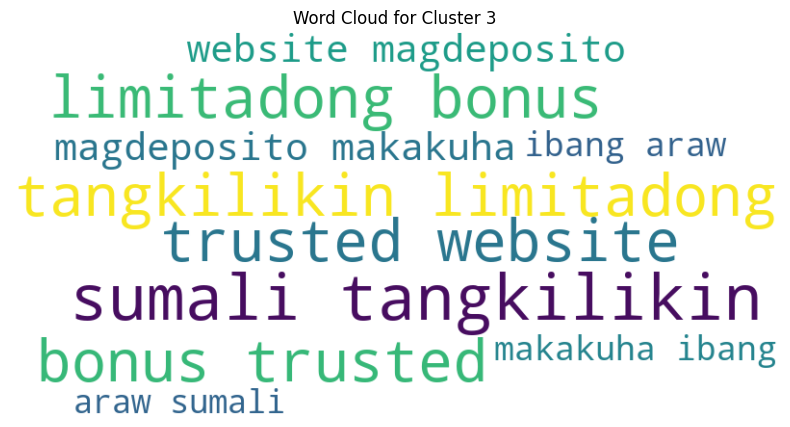

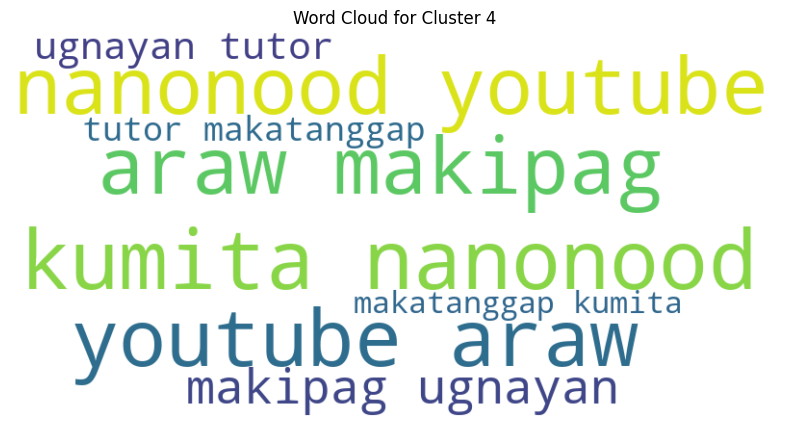

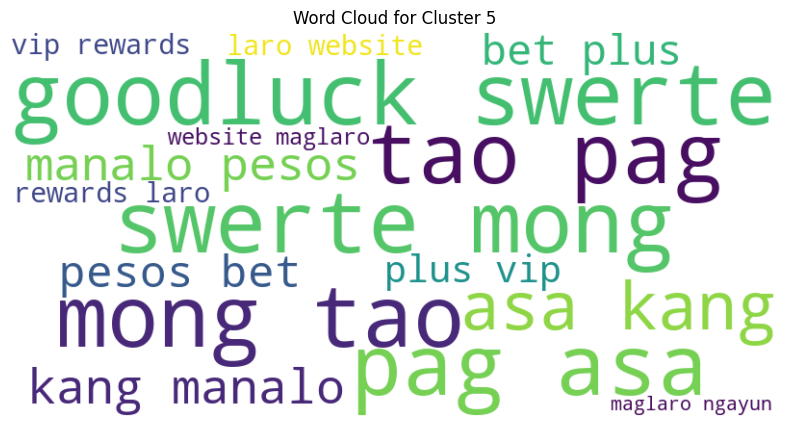

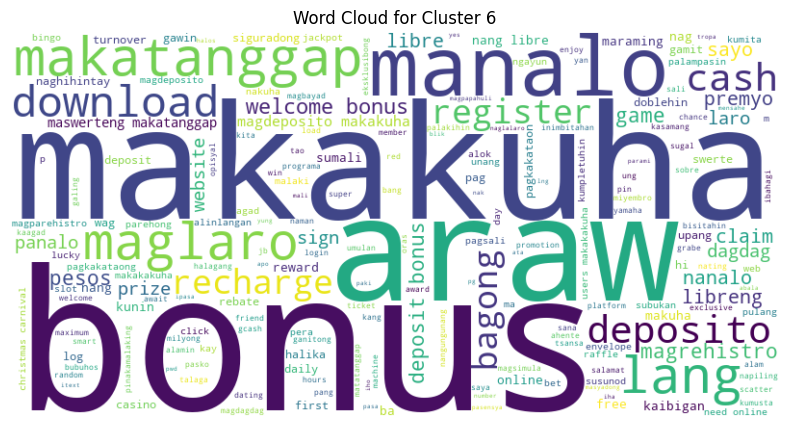

In [206]:
# Step 6: Create a word cloud for each cluster
cluster_texts = {i: [] for i in range(k)}  # Dictionary to store text for each cluster

# Group the documents by their cluster labels
for doc, label in zip(documents, labels):
    cluster_texts[label].append(doc)

# Combine all documents in each cluster into one string
for cluster_id, texts in cluster_texts.items():
    cluster_texts[cluster_id] = " ".join(texts)

# Generate and display a word cloud for each cluster
for cluster_id, cluster_text in cluster_texts.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.show()


In [175]:
# After fitting PCA
explained_variance = pca.explained_variance_ratio_

# Display the percentage of variance explained by each component
for i, variance in enumerate(explained_variance, start=1):
    print(f"Component {i}: {variance:.2%} of variance")
    
# Total variance explained by the selected components
total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance: {total_explained_variance:.2%}")


Component 1: 7.64% of variance
Component 2: 6.06% of variance
Component 3: 5.20% of variance
Component 4: 4.45% of variance
Component 5: 4.11% of variance
Component 6: 3.23% of variance
Component 7: 2.81% of variance
Component 8: 2.66% of variance
Component 9: 2.36% of variance
Component 10: 2.09% of variance
Component 11: 2.04% of variance
Component 12: 1.73% of variance
Component 13: 1.69% of variance
Component 14: 1.65% of variance
Component 15: 1.52% of variance
Component 16: 1.44% of variance
Component 17: 1.41% of variance
Component 18: 1.39% of variance
Component 19: 1.28% of variance
Component 20: 1.19% of variance
Component 21: 1.18% of variance
Component 22: 1.13% of variance
Component 23: 1.06% of variance
Component 24: 1.05% of variance
Component 25: 1.00% of variance
Component 26: 0.98% of variance
Component 27: 0.92% of variance
Component 28: 0.88% of variance
Component 29: 0.86% of variance
Component 30: 0.83% of variance
Component 31: 0.83% of variance
Component 32: 0.7

In [176]:
# Component loadings
loadings = pd.DataFrame(
    pca.components_,
    columns=[f"Feature {i}" for i in range(1, TX_dense.shape[1] + 1)],
    index=[f"PC{i}" for i in range(1, len(pca.components_) + 1)]
)

print(loadings)


      Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
PC1   -0.003234  -0.002791  -0.002408  -0.004308  -0.002614  -0.004658   
PC2   -0.001047   0.000035   0.000160  -0.000586  -0.000388   0.000459   
PC3    0.002693   0.000007   0.000029   0.009122   0.001114  -0.000683   
PC4   -0.000950  -0.000427  -0.000233  -0.001527  -0.001351   0.006178   
PC5   -0.004296   0.000456   0.000450  -0.007279   0.006077   0.001742   
PC6    0.000688  -0.003393  -0.002102   0.004928  -0.000462  -0.013664   
PC7   -0.010220  -0.008807  -0.006073   0.002387  -0.007895  -0.003213   
PC8   -0.004168  -0.004744  -0.002231  -0.001793  -0.003396   0.003398   
PC9    0.003972  -0.009576  -0.005214  -0.003673  -0.001772   0.002668   
PC10  -0.009530  -0.007777  -0.003469  -0.002101  -0.003980  -0.002078   
PC11   0.014885   0.001874  -0.000486   0.000845  -0.000379   0.006564   
PC12  -0.069625  -0.014775  -0.004892   0.010528  -0.007445   0.017227   
PC13   0.013725  -0.003536  -0.000036 

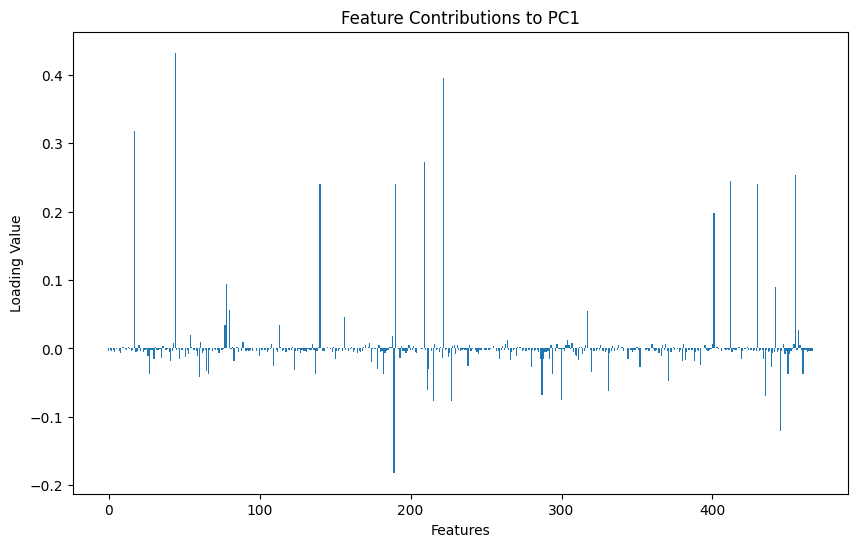

In [26]:
# Example: Visualize loadings for the first component
plt.figure(figsize=(10, 6))
plt.bar(range(len(loadings.loc['PC1'])), loadings.loc['PC1'])
plt.xlabel("Features")
plt.ylabel("Loading Value")
plt.title("Feature Contributions to PC1")
plt.show()


In [27]:
# Look at the transformed data
reduced_df = pd.DataFrame(
    X_reduced, 
    columns=[f"PC{i}" for i in range(1, X_reduced.shape[1] + 1)]
)

print(reduced_df.head())


NameError: name 'X_reduced' is not defined

-------------------------------------

## English

Silhouette Score: 0.0875936290912144
Davies-Bouldin Index: 2.345989284954111
Calinski-Harabasz Score: 24.753329252419633

Cluster Distribution:
Cluster 0: 183 points (28.55%)
Cluster 2: 160 points (24.96%)
Cluster 6: 159 points (24.80%)
Cluster 5: 78 points (12.17%)
Cluster 1: 21 points (3.28%)
Cluster 7: 14 points (2.18%)
Cluster 8: 10 points (1.56%)
Cluster 3: 9 points (1.40%)
Cluster 4: 7 points (1.09%)


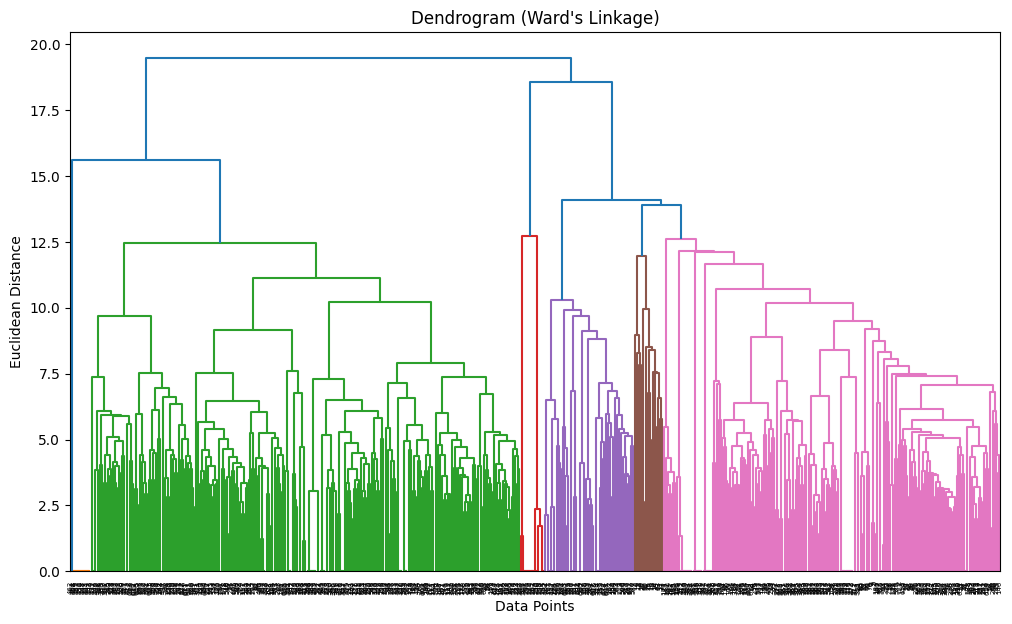

Length of EX_reduced: 641
Length of documents: 641
Length of original_texts: 641
Length of labels: 641


In [234]:
# Step 1: Reduce data to 3D using PCA
pca = PCA(n_components=60)
EX_reduced = pca.fit_transform(EX_dense)

# Step 2: Agglomerative Hierarchical Clustering
# Using Ward's linkage method
k = 9  # Specify the number of clusters
# Use PCA-reduced data for clustering instead of original data
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels = agg_clustering.fit_predict(EX_reduced)  # Use TX_reduced for clustering

# Step 3: Evaluate clustering 
silhouette_avg = silhouette_score(EX_reduced, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Measures the average "similarity ratio" of each cluster with the cluster most similar to it.
# A value closer to 0 indicates well-separated and compact clusters.
db_index = davies_bouldin_score(EX_reduced, labels)
print(f"Davies-Bouldin Index: {db_index}")

# Compares the dispersion of data within clusters to the dispersion between clusters.
# Higher values indicate better-defined clusters.
ch_score = calinski_harabasz_score(EX_reduced, labels)
print(f"Calinski-Harabasz Score: {ch_score}")


# Calculate cluster percentages
cluster_counts = pd.Series(labels).value_counts()
total_points = len(labels)
cluster_percentages = (cluster_counts / total_points) * 100

# Print cluster percentages
print("\nCluster Distribution:")
for cluster_id, count in cluster_counts.items():
    percentage = cluster_percentages[cluster_id]
    print(f"Cluster {cluster_id}: {count} points ({percentage:.2f}%)")
    
    
# Step 4: Visualization of dendrogram
plt.figure(figsize=(12, 7))
plt.title("Dendrogram (Ward's Linkage)")
dendrogram = sch.dendrogram(sch.linkage(EX_dense, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


# Trim the documents array to match the length of TX_reduced and labels
original_texts = epf['text']  # Original text
edocuments = edocuments[:len(EX_reduced)]
original_texts = original_texts[:len(EX_reduced)]

# Select the first 3 principal components for visualization
EX_reduced = EX_reduced[:, :3]

# Now create the DataFrame with the matched lengths
data_visualization = pd.DataFrame({
    'PCA1': EX_reduced[:, 0],
    'PCA2': EX_reduced[:, 1],
    'PCA3': EX_reduced[:, 2],
    'Cluster': labels,
    'Document': edocuments,
    'Original': original_texts  # Uncomment if you want to include original text
})

# Check that the lengths of the columns match
print(f"Length of EX_reduced: {len(EX_reduced)}")
print(f"Length of documents: {len(edocuments)}")
print(f"Length of original_texts: {len(original_texts)}")
print(f"Length of labels: {len(labels)}")

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(
    data_visualization,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    hover_data={
        'Document': True,          # Cleaned text
        'Original': True,          # Original text
        'Cluster': True,           # Cluster ID
    },
    title="Agglomerative Clustering (Interactive 3D Visualization)"
)

# Customize the layout
fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3',
    ),
    coloraxis_colorbar=dict(title="Cluster"),
    margin=dict(l=0, r=0, b=0, t=40)  # Adjust margins
)

# Show the plot
fig.show()

In [208]:
# Display each cluster as a separate table with left-aligned text
grouped = data_visualization.groupby('Cluster')
for cluster, group in grouped:
    print(f"Cluster {cluster}:")
    display(group[['Original', 'Document']].style.set_properties(subset=['Original', 'Document'], **{'text-align': 'left'}))
    print("\n")


Cluster 0:




Cluster 1:




Cluster 2:




Cluster 3:




Cluster 4:




Cluster 5:




Cluster 6:




Cluster 7:




Cluster 8:


In [ ]:
# Step 6: Create a word cloud for each cluster
cluster_texts = {i: [] for i in range(k)}  # Dictionary to store text for each cluster

# Group the documents by their cluster labels
for doc, label in zip(documents, labels):
    cluster_texts[label].append(doc)

# Combine all documents in each cluster into one string
for cluster_id, texts in cluster_texts.items():
    cluster_texts[cluster_id] = " ".join(texts)

# Generate and display a word cloud for each cluster
for cluster_id, cluster_text in cluster_texts.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.show()

In [56]:
# After fitting PCA
explained_variance = pca.explained_variance_ratio_

# Display the percentage of variance explained by each component
for i, variance in enumerate(explained_variance, start=1):
    print(f"Component {i}: {variance:.2%} of variance")
    
# Total variance explained by the selected components
total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance: {total_explained_variance:.2%}")


Component 1: 4.92% of variance
Component 2: 3.09% of variance
Component 3: 2.73% of variance
Component 4: 2.72% of variance
Component 5: 2.29% of variance
Component 6: 2.00% of variance
Component 7: 1.78% of variance
Component 8: 1.67% of variance
Component 9: 1.55% of variance
Component 10: 1.46% of variance
Component 11: 1.39% of variance
Component 12: 1.31% of variance
Component 13: 1.24% of variance
Component 14: 1.22% of variance
Component 15: 1.17% of variance
Component 16: 1.11% of variance
Component 17: 1.08% of variance
Component 18: 1.04% of variance
Component 19: 0.97% of variance
Component 20: 0.94% of variance
Component 21: 0.92% of variance
Component 22: 0.91% of variance
Component 23: 0.87% of variance
Component 24: 0.86% of variance
Component 25: 0.84% of variance
Component 26: 0.81% of variance
Component 27: 0.77% of variance
Component 28: 0.77% of variance
Component 29: 0.75% of variance
Component 30: 0.74% of variance
Component 31: 0.72% of variance
Component 32: 0.6

-----------------------------

Tagalog K-means

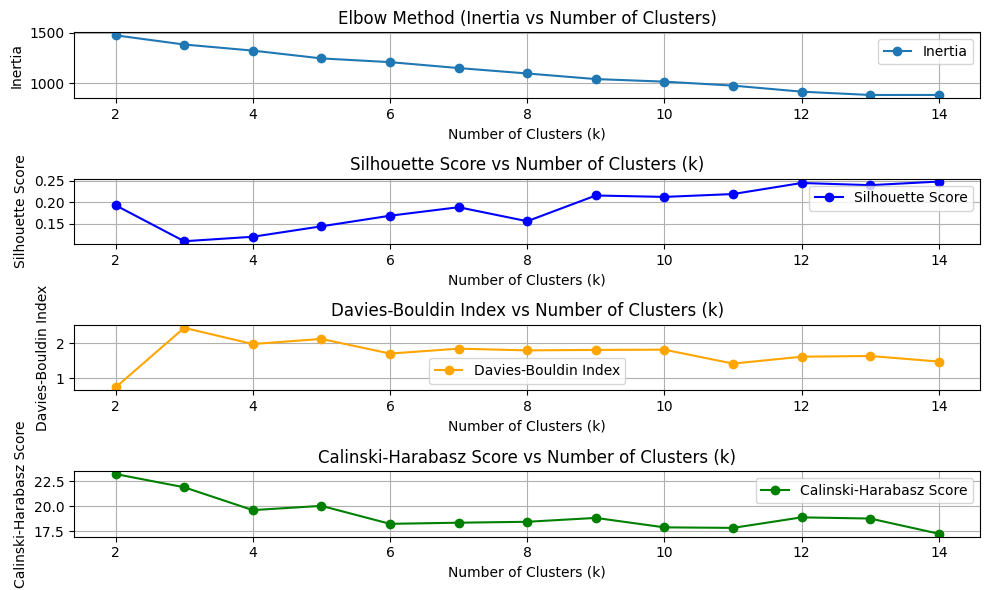

Optimal Number of Clusters (k): 14


In [239]:
# Step 1: Reduce data to 60 dimensions using PCA
pca = PCA(n_components=60)
TX_reduced = pca.fit_transform(TX_dense)

# Step 2: Initialize variables for Elbow Method and other metrics
k_values = range(2, 15)  # Test different values of k (number of clusters)
inertia_values = []  # For Elbow Method
silhouette_scores = []  # For Silhouette Score
davies_bouldin_scores = []  # For Davies-Bouldin Index
ch_scores = []  # For Calinski-Harabasz Score

# Step 3: Evaluate different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(TX_reduced)
    
    # Append metrics
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(TX_reduced, labels))
    davies_bouldin_scores.append(davies_bouldin_score(TX_reduced, labels))
    ch_scores.append(calinski_harabasz_score(TX_reduced, labels))

# Step 4: Plot the Elbow Method
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Elbow Method
plt.subplot(4, 1, 1)
plt.plot(k_values, inertia_values, marker='o', label='Inertia')
plt.title('Elbow Method (Inertia vs Number of Clusters)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.legend()

# Silhouette Score
plt.subplot(4, 1, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='blue', label='Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()

# Davies-Bouldin Index
plt.subplot(4, 1, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o', color='orange', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.legend()

# Calinski-Harabasz Score
plt.subplot(4, 1, 4)
plt.plot(k_values, ch_scores, marker='o', color='green', label='Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Select the optimal k (e.g., based on the Elbow Method or highest Silhouette Score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters (k): {optimal_k}")

# Step 6: Perform K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(TX_reduced)

# Step 7: Prepare data for visualization (reduce to 3 components)
TX_reduced_3D = TX_reduced[:, :3]
data_visualization = pd.DataFrame({
    'PCA1': TX_reduced_3D[:, 0],
    'PCA2': TX_reduced_3D[:, 1],
    'PCA3': TX_reduced_3D[:, 2],
    'Cluster': labels,
    'Document': tdocuments[:len(TX_reduced)],
    'Original': tpf['text'][:len(TX_reduced)]
})

# Step 8: Create an interactive 3D scatter plot
fig = px.scatter_3d(
    data_visualization,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    hover_data={
        'Document': True,
        'Original': True,
        'Cluster': True,
    },
    title=f"K-means Clustering (k={optimal_k}, Interactive 3D Visualization)"
)

# Customize layout
fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3',
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()



In [238]:
# Display each cluster as a separate table with left-aligned text
grouped = data_visualization.groupby('Cluster')
for cluster, group in grouped:
    print(f"Cluster {cluster}:")
    display(group[['Original', 'Document']].style.set_properties(subset=['Original', 'Document'], **{'text-align': 'left'}))
    print("\n")


Cluster 0:




Cluster 1:




Cluster 2:




Cluster 3:




Cluster 4:




Cluster 5:




Cluster 6:




Cluster 7:




Cluster 8:




Cluster 9:




Cluster 10:




Cluster 11:




Cluster 12:




Cluster 13:




Cluster 14:




Cluster 15:




Cluster 16:




Cluster 17:




Cluster 18:




Cluster 19:




Cluster 20:




Cluster 21:




Cluster 22:




Cluster 23:




Cluster 24:




Cluster 25:




Cluster 26:




Cluster 27:




Cluster 28:




Cluster 29:




Cluster 30:




Cluster 31:




Cluster 32:




Cluster 33:




Cluster 34:




Cluster 35:




Cluster 36:




Cluster 37:




Cluster 38:




Cluster 39:




Cluster 40:




Cluster 41:




Cluster 42:




Cluster 43:




Cluster 44:




Cluster 45:




Cluster 46:




Cluster 47:


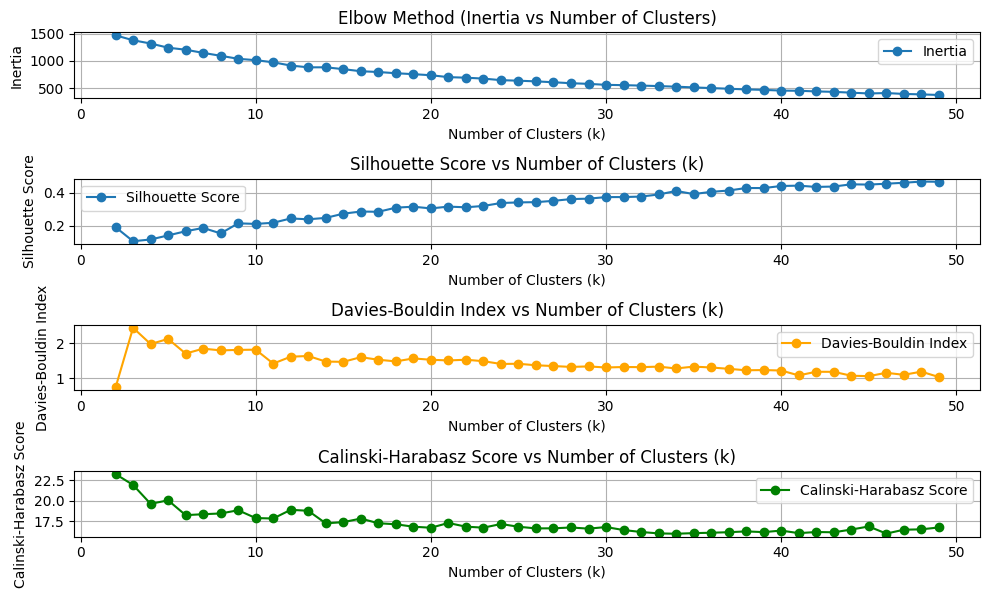

Optimal Number of Clusters (k) based on Silhouette Score: 48


In [8]:
# Step 1: Reduce data to 60 dimensions using PCA
pca = PCA(n_components=60)
TX_reduced = pca.fit_transform(TX_dense)

# Step 2: Initialize variables for Elbow Method and other metrics
k_values = range(2, 50)  # Test different values of k (number of clusters)
inertia_values = []  # For Elbow Method
silhouette_scores = []  # For Silhouette Score
davies_bouldin_scores = []  # For Davies-Bouldin Index
ch_scores = []  # For Calinski-Harabasz Score

# Step 3: Evaluate different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(TX_reduced)
    
    # Append metrics
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(TX_reduced, labels))
    davies_bouldin_scores.append(davies_bouldin_score(TX_reduced, labels))
    ch_scores.append(calinski_harabasz_score(TX_reduced, labels))

# Step 4: Plot the Elbow Method
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Elbow Method
plt.subplot(4, 1, 1)
plt.plot(k_values, inertia_values, marker='o', label='Inertia')
plt.title('Elbow Method (Inertia vs Number of Clusters)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.legend()

# Plot the metrics
import matplotlib.pyplot as plt

plt.subplot(4, 1, 2)
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o', color='orange', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(k_values, ch_scores, marker='o', color='green', label='Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Step 3: Choose the optimal k based on the metrics (e.g., highest silhouette, lowest Davies-Bouldin)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters (k) based on Silhouette Score: {optimal_k}")

# Step 4: Perform K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(TX_reduced)

# Step 5: Visualize the optimal clustering
TX_reduced_3D = TX_reduced[:, :3]
data_visualization = pd.DataFrame({
    'PCA1': TX_reduced_3D[:, 0],
    'PCA2': TX_reduced_3D[:, 1],
    'PCA3': TX_reduced_3D[:, 2],
    'Cluster': labels,
    'Document': tdocuments[:len(TX_reduced)],
    'Original': tpf['text'][:len(TX_reduced)]
})

fig = px.scatter_3d(
    data_visualization,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    hover_data={
        'Document': True,
        'Original': True,
        'Cluster': True,
    },
    title=f"K-means Clustering (k={optimal_k}, Interactive 3D Visualization)"
)

fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3',
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


In [228]:
# Display each cluster as a separate table with left-aligned text
grouped = data_visualization.groupby('Cluster')
for cluster, group in grouped:
    print(f"Cluster {cluster}:")
    display(group[['Original', 'Document']].style.set_properties(subset=['Original', 'Document'], **{'text-align': 'left'}))
    print("\n")


Cluster 0:




Cluster 1:




Cluster 2:




Cluster 3:




Cluster 4:




Cluster 5:




Cluster 6:




Cluster 7:




Cluster 8:




Cluster 9:




Cluster 10:




Cluster 11:




Cluster 12:




Cluster 13:




Cluster 14:




Cluster 15:




Cluster 16:




Cluster 17:




Cluster 18:




Cluster 19:




Cluster 20:




Cluster 21:




Cluster 22:




Cluster 23:




Cluster 24:




Cluster 25:




Cluster 26:




Cluster 27:




Cluster 28:




Cluster 29:




Cluster 30:




Cluster 31:




Cluster 32:




Cluster 33:




Cluster 34:




Cluster 35:




Cluster 36:




Cluster 37:




Cluster 38:


--------------------------

English K-Means

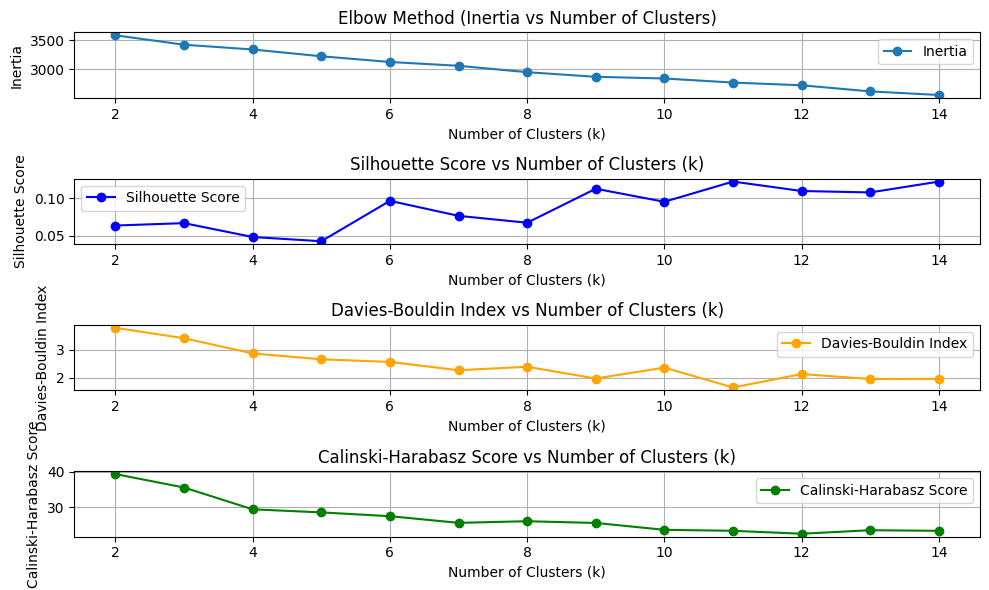

Optimal Number of Clusters (k): 11


In [241]:
# Step 1: Reduce data to 60 dimensions using PCA
pca = PCA(n_components=60)
EX_reduced = pca.fit_transform(EX_dense)

# Step 2: Initialize variables for Elbow Method and clustering metrics
k_values = range(2, 15)  # Range of k values to evaluate
inertia_values = []  # For Elbow Method
silhouette_scores = []  # For Silhouette Score
davies_bouldin_scores = []  # For Davies-Bouldin Index
ch_scores = []  # For Calinski-Harabasz Score

# Step 3: Evaluate different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(EX_reduced)
    
    # Collect metrics
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(EX_reduced, labels))
    davies_bouldin_scores.append(davies_bouldin_score(EX_reduced, labels))
    ch_scores.append(calinski_harabasz_score(EX_reduced, labels))

# Step 4: Plot the Elbow Method and metrics
plt.figure(figsize=(10, 6))

# Elbow Method (Inertia)
plt.subplot(4, 1, 1)
plt.plot(k_values, inertia_values, marker='o', label='Inertia')
plt.title('Elbow Method (Inertia vs Number of Clusters)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.legend()

# Silhouette Score
plt.subplot(4, 1, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='blue', label='Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()

# Davies-Bouldin Index
plt.subplot(4, 1, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o', color='orange', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.legend()

# Calinski-Harabasz Score
plt.subplot(4, 1, 4)
plt.plot(k_values, ch_scores, marker='o', color='green', label='Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Select the optimal k based on the Elbow Method and metrics
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters (k): {optimal_k}")

# Step 6: Perform K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(EX_reduced)

# Step 7: Reduce data to 3 dimensions for visualization
EX_reduced_3D = EX_reduced[:, :3]

# Create a DataFrame for visualization
data_visualization = pd.DataFrame({
    'PCA1': EX_reduced_3D[:, 0],
    'PCA2': EX_reduced_3D[:, 1],
    'PCA3': EX_reduced_3D[:, 2],
    'Cluster': labels,
    'Document': edocuments[:len(EX_reduced)],
    'Original': epf['text'][:len(EX_reduced)]
})

# Step 8: Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(
    data_visualization,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    hover_data={
        'Document': True,
        'Original': True,
        'Cluster': True,
    },
    title=f"K-means Clustering (k={optimal_k}, Interactive 3D Visualization)"
)

# Customize layout
fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3',
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the plot
fig.show()

In [187]:
# Step 1: Reduce data to 3D using PCA
pca = PCA(n_components=60)
EX_reduced = pca.fit_transform(EX_dense)

# Step 2: K-means Clustering
k = 7  # Specify the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(EX_reduced)  # Use TX_reduced for clustering

# Step 3: Evaluate clustering
silhouette_avg = silhouette_score(EX_reduced, labels)
print(f"Silhouette Score: {silhouette_avg}")

db_index = davies_bouldin_score(EX_reduced, labels)
print(f"Davies-Bouldin Index: {db_index}")

ch_score = calinski_harabasz_score(EX_reduced, labels)
print(f"Calinski-Harabasz Score: {ch_score}")

# Calculate cluster percentages
cluster_counts = pd.Series(labels).value_counts()
total_points = len(labels)
cluster_percentages = (cluster_counts / total_points) * 100

# Print cluster percentages
print("\nCluster Distribution:")
for cluster_id, count in cluster_counts.items():
    percentage = cluster_percentages[cluster_id]
    print(f"Cluster {cluster_id}: {count} points ({percentage:.2f}%)")

# Trim the documents array to match the length of TX_reduced and labels
documents = edocuments[:len(EX_reduced)]  # Cleaned text
original_texts = epf['text']  # Original text
documents = documents[:len(EX_reduced)]
original_texts = original_texts[:len(EX_reduced)]

# Select the first 3 principal components for visualization
EX_reduced = EX_reduced[:, :3]

# Create the DataFrame with the matched lengths
data_visualization = pd.DataFrame({
    'PCA1': EX_reduced[:, 0],
    'PCA2': EX_reduced[:, 1],
    'PCA3': EX_reduced[:, 2],
    'Cluster': labels,
    'Document': documents,
    'Original': original_texts
})

# Check that the lengths of the columns match
print(f"Length of TX_reduced: {len(EX_reduced)}")
print(f"Length of documents: {len(documents)}")
print(f"Length of original_texts: {len(original_texts)}")
print(f"Length of labels: {len(labels)}")

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(
    data_visualization,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    hover_data={
        'Document': True,          # Cleaned text
        'Original': True,          # Original text
        'Cluster': True,           # Cluster ID
    },
    title="K-means Clustering (Interactive 3D Visualization)"
)

# Customize the layout
fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3',
    ),
    coloraxis_colorbar=dict(title="Cluster"),
    margin=dict(l=0, r=0, b=0, t=40)  # Adjust margins
)

# Show the plot
fig.show()


Silhouette Score: 0.08779167627146334
Davies-Bouldin Index: 2.1467103953551083
Calinski-Harabasz Score: 26.20350199887395

Cluster Distribution:
Cluster 5: 255 points (39.78%)
Cluster 2: 185 points (28.86%)
Cluster 0: 116 points (18.10%)
Cluster 1: 52 points (8.11%)
Cluster 3: 14 points (2.18%)
Cluster 6: 11 points (1.72%)
Cluster 4: 8 points (1.25%)
Length of TX_reduced: 641
Length of documents: 641
Length of original_texts: 641
Length of labels: 641


In [242]:
# Display each cluster as a separate table with left-aligned text
grouped = data_visualization.groupby('Cluster')
for cluster, group in grouped:
    print(f"Cluster {cluster}:")
    display(group[['Original', 'Document']].style.set_properties(subset=['Original', 'Document'], **{'text-align': 'left'}))
    print("\n")

Cluster 0:




Cluster 1:




Cluster 2:




Cluster 3:




Cluster 4:




Cluster 5:




Cluster 6:




Cluster 7:




Cluster 8:




Cluster 9:




Cluster 10:


--------------------------

Tagalog DBSCAN

In [244]:
# Step 1: Reduce data to 3D using PCA
pca = PCA(n_components=60)
TX_reduced = pca.fit_transform(TX_dense)

# Step 2: DBSCAN Clustering
eps = 1  # Maximum distance between two samples for them to be in the same neighborhood
min_samples = 6  # Minimum number of samples in a neighborhood to form a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(TX_reduced)  # Use TX_reduced for clustering

# Step 3: Evaluate clustering
# Silhouette score is only valid if there are more than 1 cluster
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(TX_reduced, labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score: Not applicable (only one cluster or noise)")

db_index = davies_bouldin_score(TX_reduced, labels)
print(f"Davies-Bouldin Index: {db_index}")

# Calinski-Harabasz Score is also only valid if there are more than 1 cluster
if len(set(labels)) > 1:
    ch_score = calinski_harabasz_score(TX_reduced, labels)
    print(f"Calinski-Harabasz Score: {ch_score}")
else:
    print("Calinski-Harabasz Score: Not applicable (only one cluster or noise)")

# Calculate cluster percentages
unique_labels, counts = np.unique(labels, return_counts=True)
total_points = len(labels)
cluster_percentages = {label: (count / total_points) * 100 for label, count in zip(unique_labels, counts)}

# Print cluster percentages
print("\nCluster Distribution:")
for cluster_id, percentage in cluster_percentages.items():
    count = counts[list(unique_labels).index(cluster_id)]
    print(f"Cluster {cluster_id}: {count} points ({percentage:.2f}%)")

# Trim the documents array to match the length of TX_reduced and labels
documents = tdocuments[:len(TX_reduced)]  # Cleaned text
original_texts = tpf['text']  # Original text
documents = documents[:len(TX_reduced)]
original_texts = original_texts[:len(TX_reduced)]

# Select the first 3 principal components for visualization
TX_reduced = TX_reduced[:, :3]

# Create the DataFrame with the matched lengths
data_visualization = pd.DataFrame({
    'PCA1': TX_reduced[:, 0],
    'PCA2': TX_reduced[:, 1],
    'PCA3': TX_reduced[:, 2],
    'Cluster': labels,
    'Document': documents,
    'Original': original_texts
})

# Check that the lengths of the columns match
print(f"Length of TX_reduced: {len(TX_reduced)}")
print(f"Length of documents: {len(documents)}")
print(f"Length of original_texts: {len(original_texts)}")
print(f"Length of labels: {len(labels)}")

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(
    data_visualization,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    hover_data={
        'Document': True,          # Cleaned text
        'Original': True,          # Original text
        'Cluster': True,           # Cluster ID
    },
    title="DBSCAN Clustering (Interactive 3D Visualization)"
)

# Customize the layout
fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3',
    ),
    coloraxis_colorbar=dict(title="Cluster"),
    margin=dict(l=0, r=0, b=0, t=40)  # Adjust margins
)

# Show the plot
fig.show()


Silhouette Score: 0.1079347102051859
Davies-Bouldin Index: 1.5962071049635471
Calinski-Harabasz Score: 12.845119425192589

Cluster Distribution:
Cluster -1: 201 points (68.60%)
Cluster 0: 7 points (2.39%)
Cluster 1: 7 points (2.39%)
Cluster 2: 10 points (3.41%)
Cluster 3: 14 points (4.78%)
Cluster 4: 6 points (2.05%)
Cluster 5: 7 points (2.39%)
Cluster 6: 21 points (7.17%)
Cluster 7: 6 points (2.05%)
Cluster 8: 7 points (2.39%)
Cluster 9: 7 points (2.39%)
Length of TX_reduced: 293
Length of documents: 293
Length of original_texts: 293
Length of labels: 293


In [198]:
# Display each cluster as a separate table with left-aligned text
grouped = data_visualization.groupby('Cluster')
for cluster, group in grouped:
    print(f"Cluster {cluster}:")
    display(group[['Original', 'Document']].style.set_properties(subset=['Original', 'Document'], **{'text-align': 'left'}))
    print("\n")

Cluster -1:




Cluster 0:




Cluster 1:




Cluster 2:




Cluster 3:




Cluster 4:




Cluster 5:




Cluster 6:




Cluster 7:




Cluster 8:




Cluster 9:


---------------------------

English DBSCAN

In [243]:
# Assuming EX_dense is the dense representation of the English dataset
# Step 1: Reduce data to 3D using PCA
pca = PCA(n_components=60)
EX_reduced = pca.fit_transform(EX_dense)

# Step 2: DBSCAN Clustering
eps = 1  # Tune based on the dataset's density
min_samples = 5  # Minimum points in a neighborhood to form a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(EX_reduced)  # Use EX_reduced for clustering

# Step 3: Evaluate clustering
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(EX_reduced, labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score: Not applicable (only one cluster or noise)")

db_index = davies_bouldin_score(EX_reduced, labels)
print(f"Davies-Bouldin Index: {db_index}")

if len(set(labels)) > 1:
    ch_score = calinski_harabasz_score(EX_reduced, labels)
    print(f"Calinski-Harabasz Score: {ch_score}")
else:
    print("Calinski-Harabasz Score: Not applicable (only one cluster or noise)")

# Calculate cluster percentages
unique_labels, counts = np.unique(labels, return_counts=True)
total_points = len(labels)
cluster_percentages = {label: (count / total_points) * 100 for label, count in zip(unique_labels, counts)}

# Print cluster percentages
print("\nCluster Distribution:")
for cluster_id, percentage in cluster_percentages.items():
    count = counts[list(unique_labels).index(cluster_id)]
    print(f"Cluster {cluster_id}: {count} points ({percentage:.2f}%)")

# Visualize clusters
EX_reduced = EX_reduced[:, :3]
data_visualization = pd.DataFrame({
    'PCA1': EX_reduced[:, 0],
    'PCA2': EX_reduced[:, 1],
    'PCA3': EX_reduced[:, 2],
    'Cluster': labels,
    'Document': edocuments[:len(EX_reduced)],  # Adjusted English documents
    'Original': epf['text'][:len(EX_reduced)]  # Adjusted original texts
})

fig = px.scatter_3d(
    data_visualization,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    hover_data={
        'Document': True,
        'Original': True,
        'Cluster': True,
    },
    title="DBSCAN Clustering on English Dataset (3D Visualization)"
)

fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3',
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


Silhouette Score: -0.07745275348042398
Davies-Bouldin Index: 1.6364354703434278
Calinski-Harabasz Score: 11.544137362335285

Cluster Distribution:
Cluster -1: 501 points (78.16%)
Cluster 0: 27 points (4.21%)
Cluster 1: 7 points (1.09%)
Cluster 2: 10 points (1.56%)
Cluster 3: 5 points (0.78%)
Cluster 4: 7 points (1.09%)
Cluster 5: 7 points (1.09%)
Cluster 6: 5 points (0.78%)
Cluster 7: 11 points (1.72%)
Cluster 8: 16 points (2.50%)
Cluster 9: 14 points (2.18%)
Cluster 10: 7 points (1.09%)
Cluster 11: 11 points (1.72%)
Cluster 12: 5 points (0.78%)
Cluster 13: 8 points (1.25%)


In [202]:
# Display each cluster as a separate table with left-aligned text
grouped = data_visualization.groupby('Cluster')
for cluster, group in grouped:
    print(f"Cluster {cluster}:")
    display(group[['Original', 'Document']].style.set_properties(subset=['Original', 'Document'], **{'text-align': 'left'}))
    print("\n")

Cluster -1:




Cluster 0:




Cluster 1:




Cluster 2:




Cluster 3:




Cluster 4:




Cluster 5:




Cluster 6:




Cluster 7:




Cluster 8:




Cluster 9:




Cluster 10:




Cluster 11:




Cluster 12:




Cluster 13:
